# Nuclei Deconvolution and Compare intensities to ground truth

This notebook shows deconvolution of a simulated image.  The images are similar to the ones generated in the ABRF study [here](https://sites.google.com/view/lmrg-image-analysis-study) 


Question:  Does deconvolution restore intensities closer to ground truth?


## Get test images


1.  Get images and models from this link https://www.dropbox.com/scl/fo/yc5jaoj3ap936dqqy8urc/h?rlkey=ho8vp2nbvprzyltytryj9demp&dl=0
2.  Place both the ```data``` and ```models``` folders beside the ```docs``` folder.

In [2]:
from skimage.io import imread

import sys
sys.path.append('../')
from decon_helper import image_path

image_name='SIM 1.5 NA.tif'
truth_name='phantom.tif'
psf_name='PSF 1.5 NA.tif'

im=imread(image_path / image_name)
truth=imread(image_path / truth_name)
im=im.astype('float32')
print(im.shape, truth.shape)
psf=imread(image_path / psf_name)
psf=psf.astype('float32')

tnia available
stackview available
(119, 202, 202) (119, 202, 202)


## Show image, truth and PSF

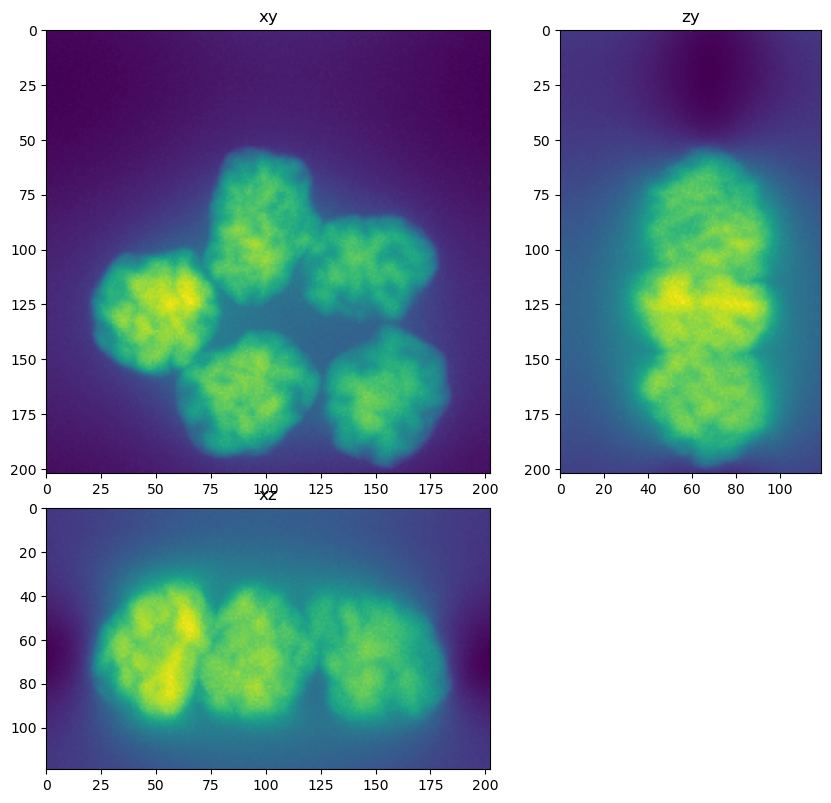

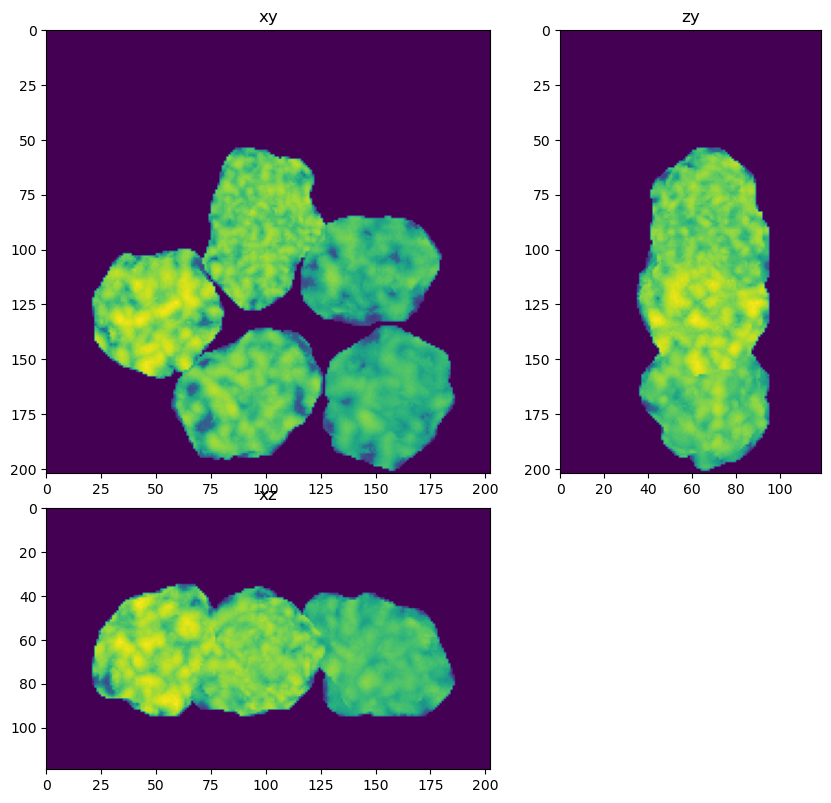

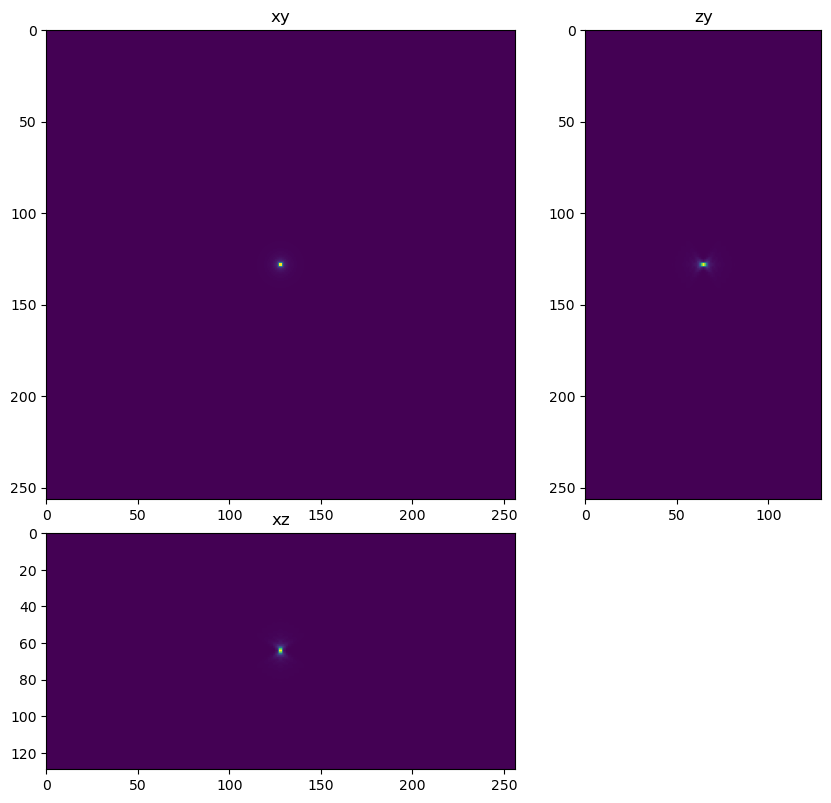

In [3]:
from tnia.plotting.projections import show_xyz_max

fig=show_xyz_max(im)
fig=show_xyz_max(truth)
fig=show_xyz_max(psf)

## Import Deconvolotion and make a 'deconvolver'



In [4]:
try:
    
    from clij2fft.richardson_lucy import richardson_lucy_nc
    print('clij2fft non-circulant rl imported')
    regularization_factor=0.0002
    def deconvolver(img, psf, iterations):
        return richardson_lucy_nc(img, psf, iterations, regularization_factor)
    
except ImportError:
    print('clij2fft non-circulant rl not imported')
    try:
        import RedLionfishDeconv as rl
        print('redlionfish rl imported')
        def deconvolver(img, psf, iterations):
            return rl.doRLDeconvolutionFromNpArrays(img, psf, niter=iterations, method='gpu', resAsUint8=False )
    except ImportError:
        print('redlionfish rl not imported')

clij2fft non-circulant rl imported


## Run deconvolution for varying iteration numbers

get lib
get lib
get lib
get lib
get lib


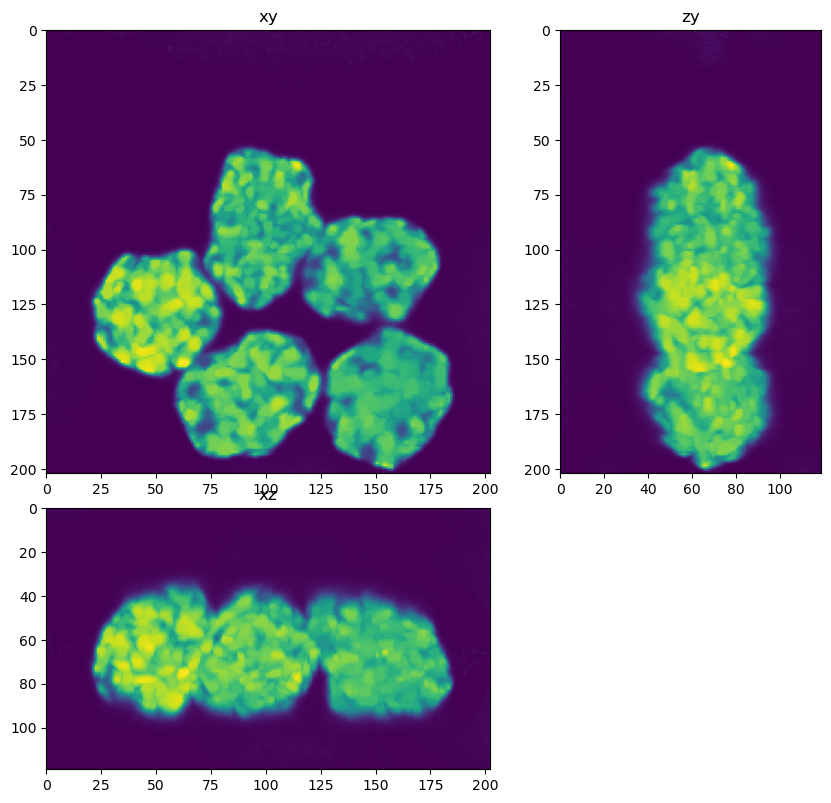

In [5]:
iterations=[20,50,100,200,500]
#iterations=[200,500,2000]

decons = [deconvolver(im, psf, i) for i in iterations]

fig = show_xyz_max(decons[-1])

## Compare to Ground Truth


In [6]:
import numpy as np

def MSE(a,b):
    return np.square(np.subtract(a,b)).mean()

def RMSE(a,b):
    return np.sqrt(MSE(a,b))

print('RMSE image and ground truth',RMSE(truth, im))

for decon, i in zip(decons, iterations):
    print('RMSE deconvolution',i,'iterations and ground truth',RMSE(truth, decon))
    

RMSE image and ground truth 7267.49
RMSE deconvolution 20 iterations and ground truth 5507.9326
RMSE deconvolution 50 iterations and ground truth 4435.0576
RMSE deconvolution 100 iterations and ground truth 3700.5608
RMSE deconvolution 200 iterations and ground truth 3073.1455
RMSE deconvolution 500 iterations and ground truth 2474.483


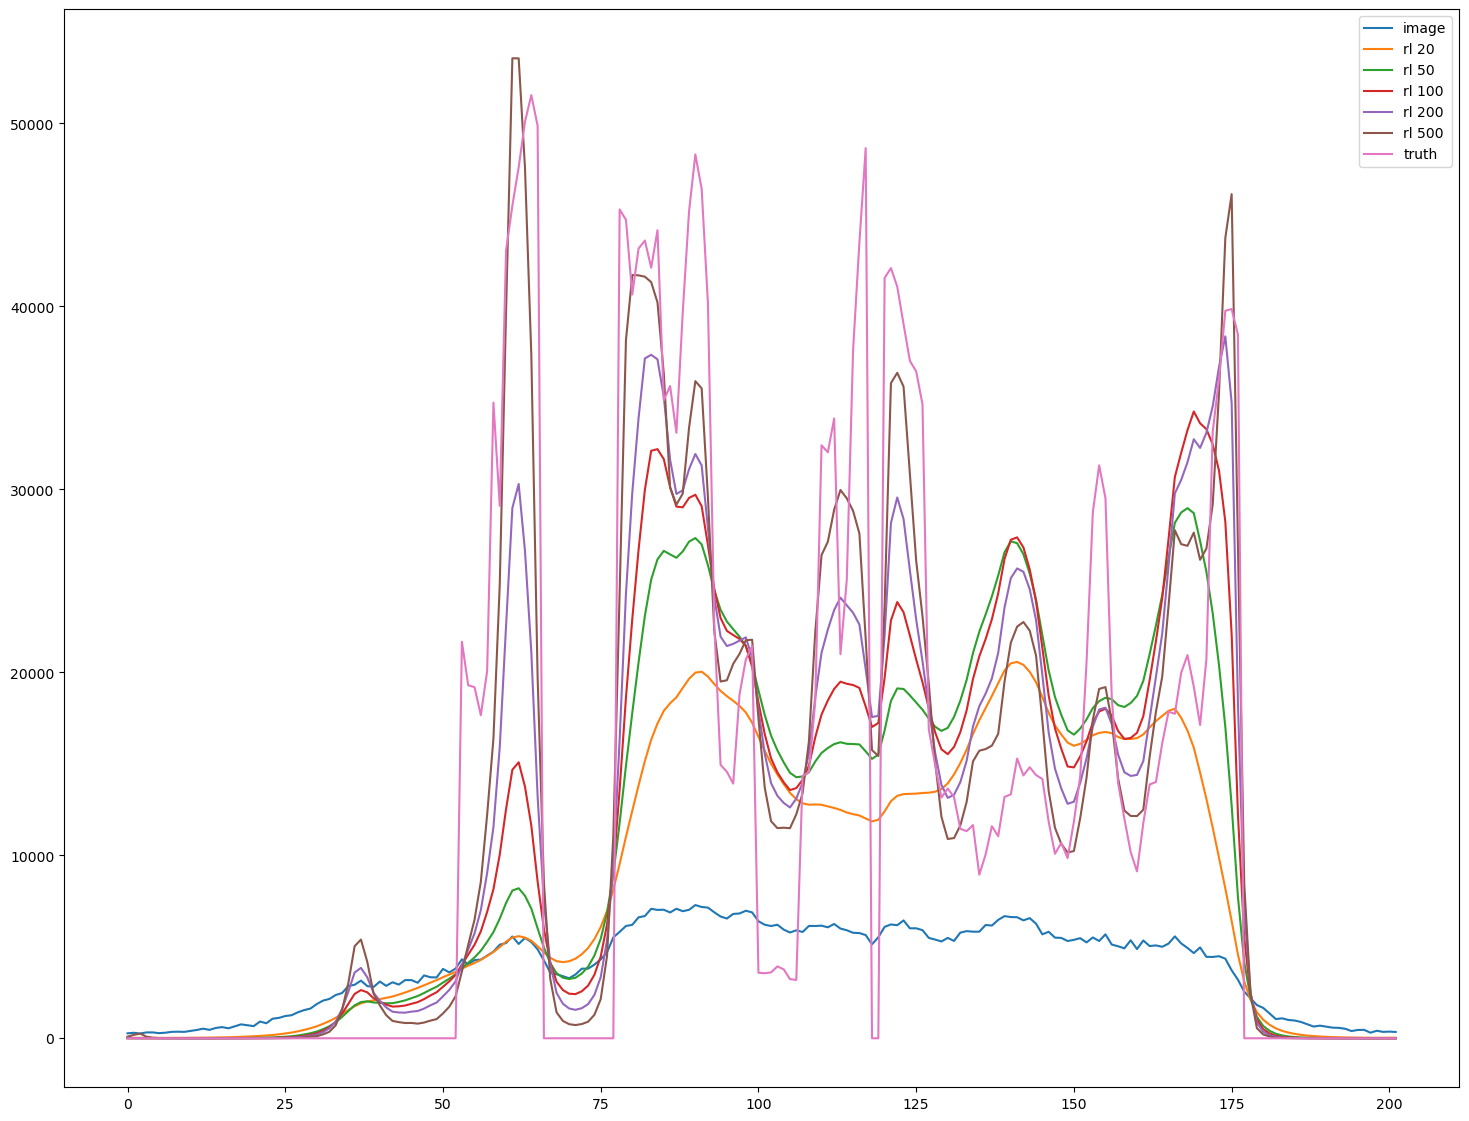

In [7]:
import matplotlib.pyplot as plt
s=im.shape

fig, ax = plt.subplots(figsize=(18,14))

line=im[int(s[0]/2),int(s[1]/2),:]
ax.plot(line, label = 'image')

for decon, i in zip(decons, iterations):
    line=decon[int(s[0]/2),int(s[1]/2),:]
    ax.plot(line, label='rl '+str(i))

line=truth[int(s[0]/2),int(s[1]/2),:]
ax.plot(line, label='truth')

ax.legend()

## Visualize in Napari

In [7]:
import napari
viewer=napari.Viewer()

viewer.add_image(im)

for decon, i in zip(decons, iterations):
    viewer.add_image(decon,name=str(i)+' iterations')
 
viewer.add_image(truth)


<Image layer 'truth' at 0x7f1c0bfc2e50>